### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocessor
import seaborn as sns

In [2]:
car_data = pd.read_csv('used_cars.csv')

In [3]:
car_data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
car_data.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

### Data Cleaning

In [6]:
# removing "mi." and "," from the milage column and converting it to integer
mileage = car_data.get('milage').apply(lambda x: x.replace(',', '').split(' mi.')[0]).apply(lambda x: int(float(x)))
car_data = car_data.drop(columns='milage')
car_data['mileage'] = mileage

In [7]:
# removing "," and "$" from the price column and converting it to integer
price = car_data.get('price').apply(lambda x: x.replace(',', '').split('$')[1]).apply(lambda x: int(float(x)))
car_data = car_data.drop(columns='price')
car_data['price'] = price

In [8]:
car_data.head()

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,mileage,price
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,51000,10300
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,22372,54598
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,88900,15500
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,9835,34999


In [9]:
# checking for missing values
missing_values = car_data.isnull().sum()
print(missing_values)

brand             0
model             0
model_year        0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
mileage           0
price             0
dtype: int64


null values for accident and clean_title just means there's no accident record for those datapoints, since it's a categorical variable, we use 'Unknown' as a placeholder.

In [10]:
car_data.fillna({'fuel_type': 'Unknown'}, inplace=True)
car_data.fillna({'accident': 'Unknown'}, inplace=True)
car_data.fillna({'clean_title': 'Unknown'}, inplace=True)

In [11]:
car_data

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,mileage,price
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,51000,10300
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,22372,54598
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,88900,15500
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,9835,34999
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,714,349950
4005,Audi,S4 3.0T Premium Plus,2022,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,10900,53900
4006,Porsche,Taycan,2022,Unknown,Electric,Automatic,Black,Black,None reported,Unknown,2116,90998
4007,Ford,F-150 Raptor,2020,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,33000,62999


In [12]:
car_data

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,mileage,price
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,51000,10300
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,22372,54598
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,88900,15500
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,9835,34999
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,714,349950
4005,Audi,S4 3.0T Premium Plus,2022,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,10900,53900
4006,Porsche,Taycan,2022,Unknown,Electric,Automatic,Black,Black,None reported,Unknown,2116,90998
4007,Ford,F-150 Raptor,2020,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,33000,62999


In [13]:
car_data.engine.value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
–                                                        45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
                                                         ..
323.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
405.0HP 4.2L 8 Cylinder Engine Gasoline Fuel              1
353.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
275.0HP 4.8L 8 Cylinder Engine Gasoline Fuel              1
420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel             1
Name: count, Length: 1146, dtype: int64

In [14]:
import re

def extract_engine_info(engine_str):
    hp = re.search(r'(\d+\.?\d*)HP', engine_str)
    liters = re.search(r'(\d+\.?\d*)L', engine_str)
    cylinders = re.search(r'(\d+) Cylinder', engine_str)
    fuel = re.search(r'(Gasoline|Electric|Diesel|Flex Fuel|Hybrid|Turbo|Mild Electric Hybrid)', engine_str)
    
    return {
        'horsepower': float(hp.group(1)) if hp else None,
        'engine_size': float(liters.group(1)) if liters else None,
        'cylinders': int(cylinders.group(1)) if cylinders else None,
        'fuel_type_engine': fuel.group(1) if fuel else None
    }

# Apply the function to the 'engine' column
engine_info = car_data['engine'].apply(extract_engine_info)

# Convert the resulting series of dictionaries into a DataFrame and merge with the original data
engine_df = pd.DataFrame(engine_info.tolist())
car_data = pd.concat([car_data, engine_df], axis=1)

In [15]:
car_data.fillna({'horsepower': car_data['horsepower'].median()}, inplace=True)
car_data.fillna({'engine_size': car_data['engine_size'].median()}, inplace=True)
car_data.fillna({'cylinders': car_data['cylinders'].median()}, inplace=True)

In [16]:
car_data

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,mileage,price,horsepower,engine_size,cylinders,fuel_type_engine
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,51000,10300,300.0,3.7,6.0,Flex Fuel
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005,310.0,3.8,6.0,None
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,22372,54598,310.0,3.5,6.0,None
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,88900,15500,354.0,3.5,6.0,Electric
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,9835,34999,310.0,2.0,6.0,Turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,714,349950,310.0,6.0,6.0,Turbo
4005,Audi,S4 3.0T Premium Plus,2022,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,10900,53900,349.0,3.0,6.0,Gasoline
4006,Porsche,Taycan,2022,Unknown,Electric,Automatic,Black,Black,None reported,Unknown,2116,90998,310.0,3.5,6.0,Electric
4007,Ford,F-150 Raptor,2020,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,33000,62999,450.0,3.5,6.0,Gasoline


In [17]:
def simplify_fuel_info(row):
    if row['fuel_type'] != "Unknown":
        return row['fuel_type']
    elif row['fuel_type_engine'] and row['fuel_type_engine'] != "None":
        return row['fuel_type_engine']
    else:
        return "Unknown"

car_data['simplified_fuel_type'] = car_data.apply(simplify_fuel_info, axis=1)

In [18]:
car_data

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,mileage,price,horsepower,engine_size,cylinders,fuel_type_engine,simplified_fuel_type
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,51000,10300,300.0,3.7,6.0,Flex Fuel,E85 Flex Fuel
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005,310.0,3.8,6.0,None,Gasoline
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,22372,54598,310.0,3.5,6.0,None,Gasoline
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,88900,15500,354.0,3.5,6.0,Electric,Hybrid
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,9835,34999,310.0,2.0,6.0,Turbo,Gasoline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,714,349950,310.0,6.0,6.0,Turbo,Gasoline
4005,Audi,S4 3.0T Premium Plus,2022,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,10900,53900,349.0,3.0,6.0,Gasoline,Gasoline
4006,Porsche,Taycan,2022,Unknown,Electric,Automatic,Black,Black,None reported,Unknown,2116,90998,310.0,3.5,6.0,Electric,Electric
4007,Ford,F-150 Raptor,2020,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,33000,62999,450.0,3.5,6.0,Gasoline,Gasoline


In [19]:
correlation_with_price = car_data[['fuel_type', 'fuel_type_engine', 'simplified_fuel_type','price']].apply(lambda x: x.factorize()[0]).corr()
print(correlation_with_price['price'])

fuel_type              -0.022596
fuel_type_engine       -0.155840
simplified_fuel_type   -0.024867
price                   1.000000
Name: price, dtype: float64


All these columns (almost similar) have a very weak correlation with price (leaning towards 0). It's best to jus tkeep simplified_fuel_type and drop the other two, for now.

In [20]:
car_data.drop(columns=['fuel_type', 'fuel_type_engine'], inplace=True)

In [21]:
car_data

,brand,model,model_year,engine,transmission,ext_col,int_col,accident,clean_title,mileage,price,horsepower,engine_size,cylinders,simplified_fuel_type
0,Ford,Utility Police Interceptor Base,2013,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,51000,10300,300.0,3.7,6.0,E85 Flex Fuel
1,Hyundai,Palisade SEL,2021,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005,310.0,3.8,6.0,Gasoline
2,Lexus,RX 350 RX 350,2022,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,22372,54598,310.0,3.5,6.0,Gasoline
3,INFINITI,Q50 Hybrid Sport,2015,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,88900,15500,354.0,3.5,6.0,Hybrid
4,Audi,Q3 45 S line Premium Plus,2021,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,9835,34999,310.0,2.0,6.0,Gasoline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,714,349950,310.0,6.0,6.0,Gasoline
4005,Audi,S4 3.0T Premium Plus,2022,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,10900,53900,349.0,3.0,6.0,Gasoline
4006,Porsche,Taycan,2022,Electric,Automatic,Black,Black,None reported,Unknown,2116,90998,310.0,3.5,6.0,Electric
4007,Ford,F-150 Raptor,2020,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,33000,62999,450.0,3.5,6.0,Gasoline


In [22]:
# Standardizing the transmission values
def standardize_transmission(transmission):
    # Convert to lowercase to make comparison easier
    transmission = transmission.lower()

    # Automatic Transmissions
    if pd.isnull(transmission) or transmission in ["–", "f", "2", "scheduled for or in production"]:
        return "Unknown"
    elif "a/t" in transmission or "at" in transmission or "automatic" in transmission:
        if "8-speed" in transmission:
            return "8-Speed Automatic"
        elif "7-speed" in transmission:
            return "7-Speed Automatic"
        elif "6-speed" in transmission:
            return "6-Speed Automatic"
        elif "9-speed" in transmission:
            return "9-Speed Automatic"
        elif "10-speed" in transmission:
            return "10-Speed Automatic"
        elif "5-speed" in transmission:
            return "5-Speed Automatic"
        elif "4-speed" in transmission:
            return "4-Speed Automatic"
        elif "1-speed" in transmission:
            return "1-Speed Automatic"
        elif "2-speed" in transmission:
            return "2-Speed Automatic"
        else:
            return "Automatic"
    elif "m/t" in transmission or "manual" in transmission:
        return "Manual"
    elif "cvt" in transmission:
        return "CVT"
    elif "dual" in transmission or "auto-shift" in transmission:
        return "Dual-Clutch"
    elif "overdrive" in transmission:
        return "Overdrive"
    elif "single-speed" in transmission or "1-speed" in transmission:
        return "Single-Speed"
    else:
        return transmission.capitalize()

car_data['transmission'] = car_data['transmission'].apply(standardize_transmission)

# Check the unique values after standardization
print(car_data['transmission'].value_counts())

transmission
Automatic                1324
8-Speed Automatic         593
6-Speed Automatic         441
Dual-Clutch               398
Manual                    372
7-Speed Automatic         241
10-Speed Automatic        176
9-Speed Automatic         122
5-Speed Automatic          95
1-Speed Automatic          78
4-Speed Automatic          76
CVT                        63
Unknown                    10
Overdrive                   7
Variable                    4
2-Speed Automatic           4
Auto, 6-spd w/cmdshft       1
6-speed                     1
Single-Speed                1
7-speed                     1
6 speed mt                  1
Name: count, dtype: int64


In [23]:
print(car_data['transmission'].value_counts())

transmission
Automatic                1324
8-Speed Automatic         593
6-Speed Automatic         441
Dual-Clutch               398
Manual                    372
7-Speed Automatic         241
10-Speed Automatic        176
9-Speed Automatic         122
5-Speed Automatic          95
1-Speed Automatic          78
4-Speed Automatic          76
CVT                        63
Unknown                    10
Overdrive                   7
Variable                    4
2-Speed Automatic           4
Auto, 6-spd w/cmdshft       1
6-speed                     1
Single-Speed                1
7-speed                     1
6 speed mt                  1
Name: count, dtype: int64


In [24]:
car_data

,brand,model,model_year,engine,transmission,ext_col,int_col,accident,clean_title,mileage,price,horsepower,engine_size,cylinders,simplified_fuel_type
0,Ford,Utility Police Interceptor Base,2013,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed Automatic,Black,Black,At least 1 accident or damage reported,Yes,51000,10300,300.0,3.7,6.0,E85 Flex Fuel
1,Hyundai,Palisade SEL,2021,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005,310.0,3.8,6.0,Gasoline
2,Lexus,RX 350 RX 350,2022,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,22372,54598,310.0,3.5,6.0,Gasoline
3,INFINITI,Q50 Hybrid Sport,2015,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed Automatic,Black,Black,None reported,Yes,88900,15500,354.0,3.5,6.0,Hybrid
4,Audi,Q3 45 S line Premium Plus,2021,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,9835,34999,310.0,2.0,6.0,Gasoline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic,C / C,Hotspur,None reported,Yes,714,349950,310.0,6.0,6.0,Gasoline
4005,Audi,S4 3.0T Premium Plus,2022,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Dual-Clutch,Black,Black,None reported,Yes,10900,53900,349.0,3.0,6.0,Gasoline
4006,Porsche,Taycan,2022,Electric,Automatic,Black,Black,None reported,Unknown,2116,90998,310.0,3.5,6.0,Electric
4007,Ford,F-150 Raptor,2020,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic,Blue,Black,None reported,Yes,33000,62999,450.0,3.5,6.0,Gasoline


In [25]:
current_year = 2024
car_data['car_age'] = current_year - car_data['model_year']

In [26]:
car_data = car_data.rename(columns={
    'engine': 'engine_specs',
    'ext_col': 'ext_color',
    'int_col': 'int_color',
    'accident':'accident_reported',
    'cylinders':'engine_cylinder',
    'simplified_fuel_type':'fuel_type',
})

In [27]:
car_data.head()

,brand,model,model_year,engine_specs,transmission,ext_color,int_color,accident_reported,clean_title,mileage,price,horsepower,engine_size,engine_cylinder,fuel_type,car_age
0,Ford,Utility Police Interceptor Base,2013,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed Automatic,Black,Black,At least 1 accident or damage reported,Yes,51000,10300,300.0,3.7,6.0,E85 Flex Fuel,11
1,Hyundai,Palisade SEL,2021,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005,310.0,3.8,6.0,Gasoline,3
2,Lexus,RX 350 RX 350,2022,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,22372,54598,310.0,3.5,6.0,Gasoline,2
3,INFINITI,Q50 Hybrid Sport,2015,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed Automatic,Black,Black,None reported,Yes,88900,15500,354.0,3.5,6.0,Hybrid,9
4,Audi,Q3 45 S line Premium Plus,2021,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,9835,34999,310.0,2.0,6.0,Gasoline,3


### Exploratory Data Analysis 

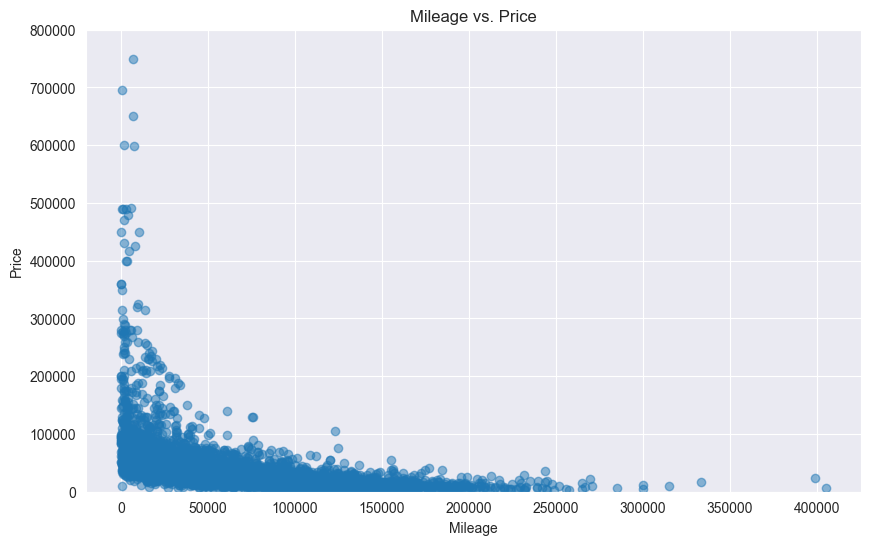

In [28]:
# Scatter plot of Mileage vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(car_data['mileage'], car_data['price'], alpha=0.5)
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylim(0, 0.8e6)
plt.ylabel('Price')
plt.show()

It shows a general trend where cars with higher mileage typically have lower prices, which is expected.

/var/folders/c5/mc67gqqj6q5f2tjjkktbh9th0000gn/T/ipykernel_47116/1973437484.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette='viridis')


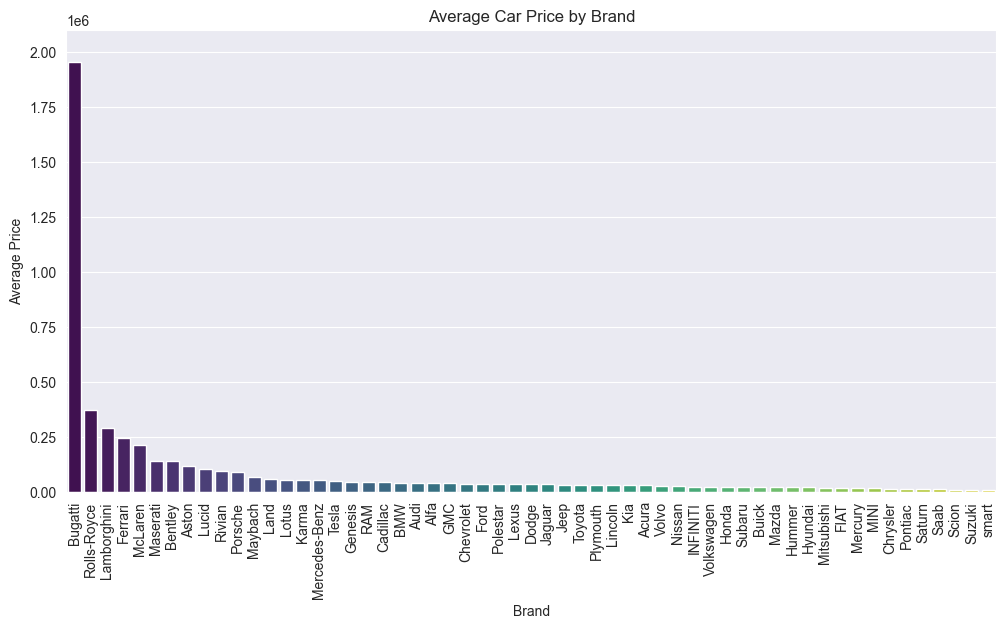

In [29]:
brand_avg_price = car_data.groupby('brand')['price'].mean().sort_values(ascending=False)

# Plotting the average price by brand
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette='viridis')
plt.ylim(0, 2.1e6)
plt.title('Average Car Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90) 
plt.show()

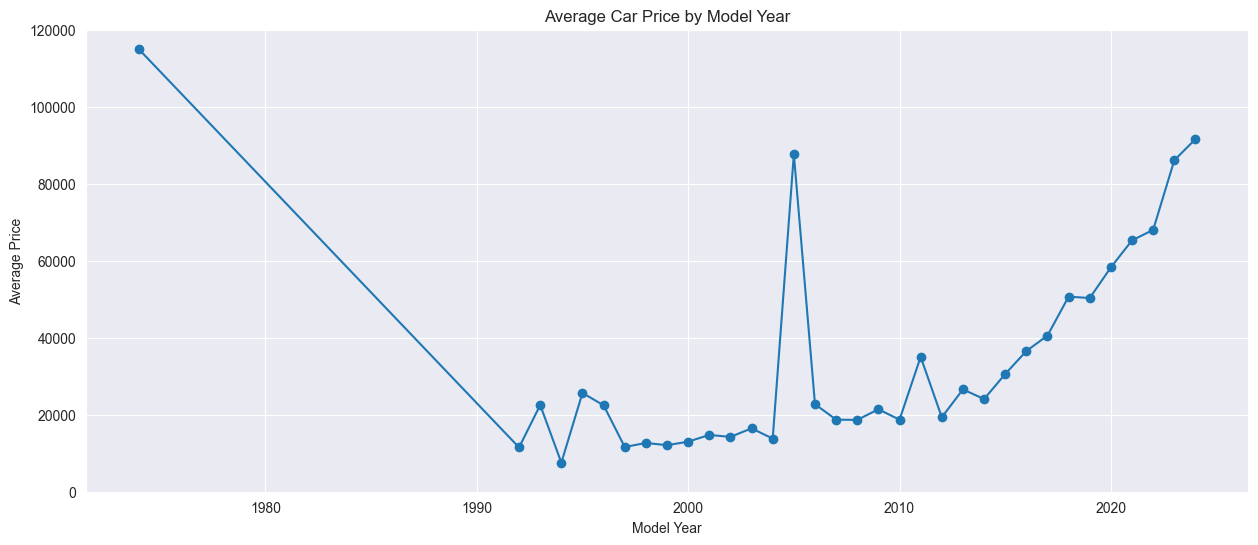

In [30]:
year_avg_price = car_data.groupby('model_year')['price'].mean().reset_index()
year_avg_price = year_avg_price.sort_values(by='model_year')

# Plotting the average price over the years
plt.figure(figsize=(15, 6))
plt.plot(year_avg_price['model_year'], year_avg_price['price'], marker='o')
plt.ylim(0, 0.12e6)

plt.title('Average Car Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [31]:
# Compare 2004, 2005, and 2006
comparison_data = car_data[car_data['model_year'].isin([2004, 2005, 2006])]
print(comparison_data.groupby('model_year')['price'].describe())

            count          mean            std     min     25%      50%  \
model_year                                                                
2004         60.0  13791.933333   10125.672034  2300.0  7462.5  10250.0   
2005         72.0  87680.583333  393578.679754  2000.0  7175.0  12499.5   
2006         66.0  22743.393939   35082.328202  4000.0  8600.0  13489.5   

                 75%        max  
model_year                       
2004        18213.25    64250.0  
2005        21812.25  2954083.0  
2006        21311.25   259000.0  


In [32]:
# Inspect data for the year 2005
spike_2005_data = car_data[car_data['model_year'] == 2005]
print(spike_2005_data[['brand', 'model', 'price', 'mileage', 'fuel_type']].sort_values(by='price', ascending=False))

            brand              model    price  mileage fuel_type
693      Maserati  Quattroporte Base  2954083    32000  Gasoline
3046      Porsche    Carrera GT Base  1599000     4400  Gasoline
203          Ford                 GT   429998     1897  Gasoline
2478  Lamborghini    Murcielago Base   220000    22703  Gasoline
2530      Ferrari    F430 Berlinetta    99999    38686  Gasoline
...           ...                ...      ...      ...       ...
659        Nissan          Murano SL     3950   125500  Gasoline
618         Volvo             S40 T5     3550   257700  Gasoline
2486     Chrysler        300 Touring     3500   119000  Gasoline
903         Buick        Rainier CXL     2800   147589  Gasoline
425       Lincoln     Aviator Luxury     2000   140000  Gasoline

[72 rows x 5 columns]


#### The table shows that in 2005, the dataset includes several very expensive cars, such as a Maserati Quattroporte, Porsche Carrera GT, Ford GT, Lamborghini Murcielago, and Ferrari F430.
#### The inclusion of these high-priced vehicles in your dataset is causing a significant spike in the average car price for 2005. This is evident from the earlier summary statistics, where the mean price for 2005 was much higher than surrounding years, driven by these outliers.

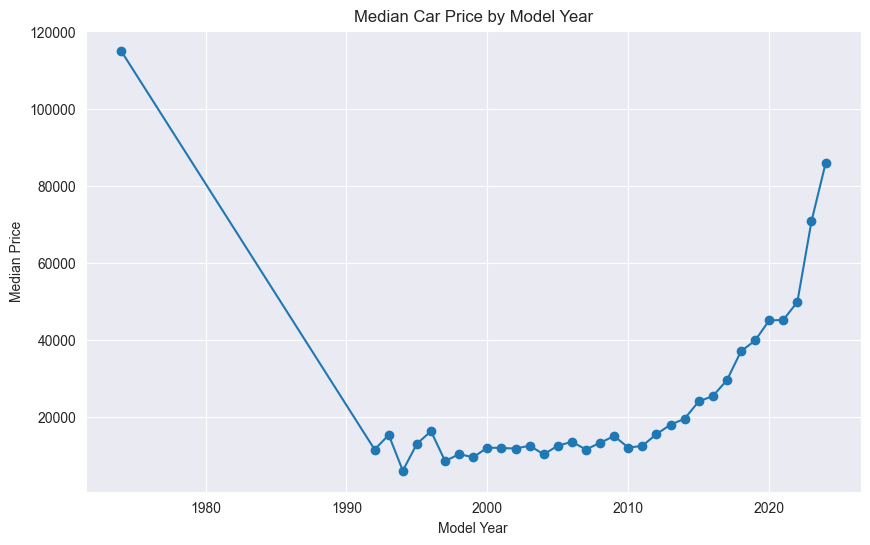

In [33]:
# Group by 'model_year' and calculate the median price
year_median_price = car_data.groupby('model_year')['price'].median().reset_index()

# Plotting the median price over the years
plt.figure(figsize=(10, 6))
plt.plot(year_median_price['model_year'], year_median_price['price'], marker='o')
plt.title('Median Car Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()

#### The median offers a better measure of the typical car price in this dataset, particularly when outliers are present, which can disproportionately skew the mean.

In [34]:
# Inspecting cars from the early years (e.g., before 1990)
early_years_data = car_data[car_data['model_year'] < 1980]
print(early_years_data[['brand', 'model', 'price', 'mileage', 'fuel_type']].sort_values(by='price', ascending=False))

    brand   model   price  mileage fuel_type
855  Ford  Bronco  115000     6217         –


#### Upon analyzing the car price data across different model years, it was observed that the average and median car prices for the early years (especially before 1980) were unusually high. 
#### A further investigation into the data revealed that there was only one car entry from before 1980, specifically a Ford Bronco listed at a price of $115,000. This single entry was responsible for the high average and median prices observed for that period.

In [35]:
# Remove cars from before 1980
car_data_filtered = car_data[car_data['model_year'] >= 1980]

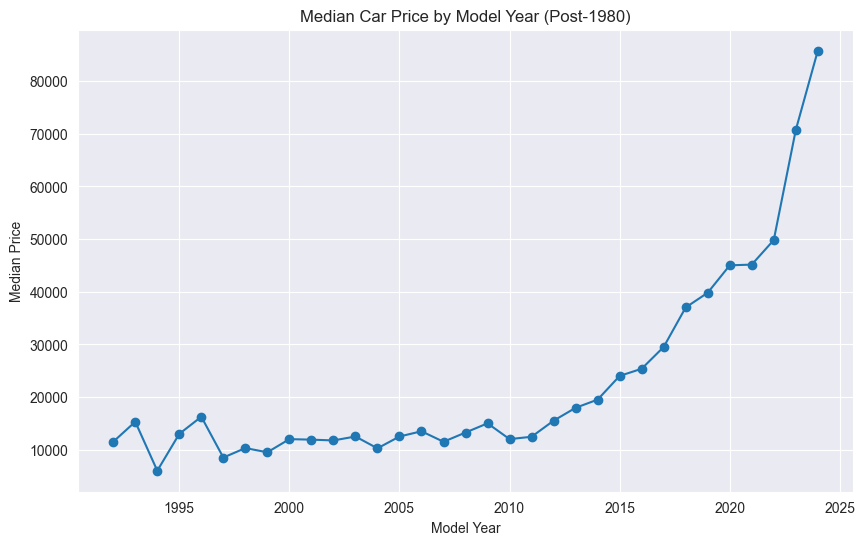

In [36]:
# Recalculate median prices after filtering
year_median_price_filtered = car_data_filtered.groupby('model_year')['price'].median().reset_index()

# Plotting the filtered median price over the years
plt.figure(figsize=(10, 6))
plt.plot(year_median_price_filtered['model_year'], year_median_price_filtered['price'], marker='o')
plt.title('Median Car Price by Model Year (Post-1980)')
plt.xlabel('Model Year')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()

#### The removal of the single pre-1980 car entry was a necessary step to ensure the accuracy and integrity of the data analysis. By filtering out this outlier, the analysis now more accurately reflects the trends in car prices over the years, providing insights that are more representative of the overall market.

In [37]:
luxury_threshold = 100000  # Adjust based on your data

# Segment the data
luxury_cars = car_data[car_data['price'] > luxury_threshold]
standard_cars = car_data[car_data['price'] <= luxury_threshold]

print("Luxury Cars Analysis:")
print(luxury_cars.describe())

print("Standard Cars Analysis:")
print(standard_cars.describe())

Luxury Cars Analysis:
        model_year        mileage         price  horsepower  engine_size  \
count   234.000000     234.000000  2.340000e+02  234.000000   234.000000   
mean   2019.363248   12722.555556  2.197380e+05  433.923077     4.329915   
std       4.793649   14731.024720  2.574364e+05  133.986173     1.172559   
min    1974.000000     105.000000  1.010000e+05  161.000000     2.000000   
25%    2018.000000    2442.000000  1.214800e+05  310.000000     3.500000   
50%    2020.000000    8250.000000  1.534000e+05  409.000000     4.000000   
75%    2022.000000   18875.000000  2.296750e+05  559.250000     5.200000   
max    2024.000000  123112.000000  2.954083e+06  808.000000     8.400000   

       engine_cylinder     car_age  
count       234.000000  234.000000  
mean          7.068376    4.636752  
std           1.749195    4.793649  
min           4.000000    0.000000  
25%           6.000000    2.000000  
50%           6.000000    4.000000  
75%           8.000000    6.000000

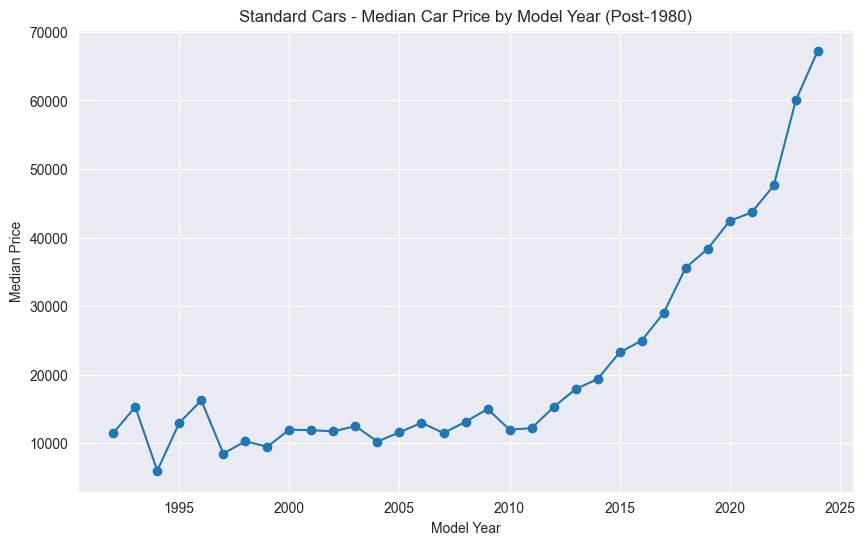

In [38]:
# Recalculate median prices after filtering
year_median_price_filtered = standard_cars.groupby('model_year')['price'].median().reset_index()

# Plotting the filtered median price over the years
plt.figure(figsize=(10, 6))
plt.plot(year_median_price_filtered['model_year'], year_median_price_filtered['price'], marker='o')
plt.title('Standard Cars - Median Car Price by Model Year (Post-1980)')
plt.xlabel('Model Year')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()

fuel_type
Gasoline          3309
Hybrid             194
Electric           165
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
Unknown              5
not supported        2
Name: count, dtype: int64


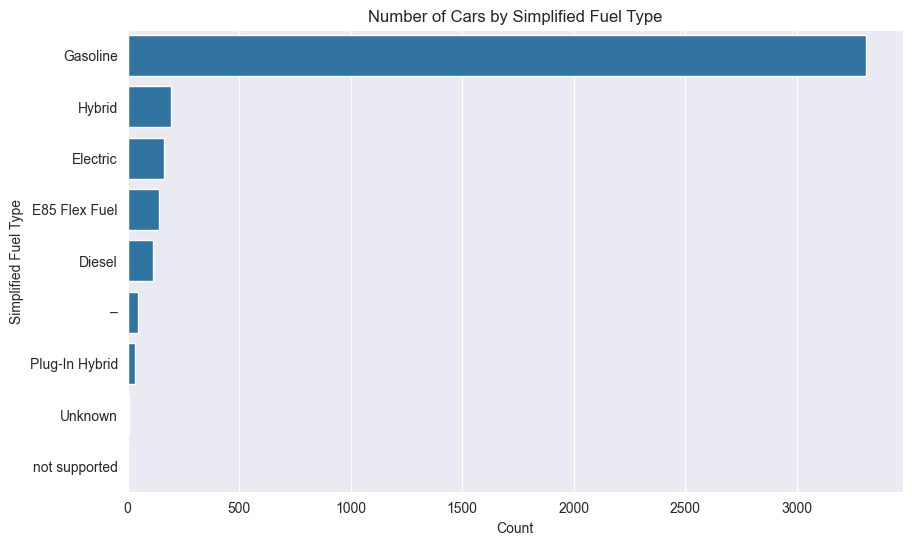

In [39]:
fuel_type_counts = car_data['fuel_type'].value_counts()
print(fuel_type_counts)
plt.figure(figsize=(10, 6))
sns.countplot(y='fuel_type', data=car_data, order=fuel_type_counts.index)
plt.title('Number of Cars by Simplified Fuel Type')
plt.xlabel('Count')
plt.ylabel('Simplified Fuel Type')
plt.show()

### Model Training

In [40]:
car_data

,brand,model,model_year,engine_specs,transmission,ext_color,int_color,accident_reported,clean_title,mileage,price,horsepower,engine_size,engine_cylinder,fuel_type,car_age
0,Ford,Utility Police Interceptor Base,2013,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed Automatic,Black,Black,At least 1 accident or damage reported,Yes,51000,10300,300.0,3.7,6.0,E85 Flex Fuel,11
1,Hyundai,Palisade SEL,2021,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005,310.0,3.8,6.0,Gasoline,3
2,Lexus,RX 350 RX 350,2022,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,22372,54598,310.0,3.5,6.0,Gasoline,2
3,INFINITI,Q50 Hybrid Sport,2015,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed Automatic,Black,Black,None reported,Yes,88900,15500,354.0,3.5,6.0,Hybrid,9
4,Audi,Q3 45 S line Premium Plus,2021,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,9835,34999,310.0,2.0,6.0,Gasoline,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic,C / C,Hotspur,None reported,Yes,714,349950,310.0,6.0,6.0,Gasoline,1
4005,Audi,S4 3.0T Premium Plus,2022,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Dual-Clutch,Black,Black,None reported,Yes,10900,53900,349.0,3.0,6.0,Gasoline,2
4006,Porsche,Taycan,2022,Electric,Automatic,Black,Black,None reported,Unknown,2116,90998,310.0,3.5,6.0,Electric,2
4007,Ford,F-150 Raptor,2020,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic,Blue,Black,None reported,Yes,33000,62999,450.0,3.5,6.0,Gasoline,4


#### Feature Selection

In [41]:
numerical_features = ['mileage', 'car_age', 'horsepower', 'engine_size', 'engine_cylinder']
categorical_features = ['brand', 'model', 'engine_specs', 'transmission', 'ext_color', 'int_color', 'accident_reported', 'clean_title', 'fuel_type', 'model_year']

#### Encoding Categorical Variables & Scaling Numerical Data

In [42]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown = 'ignore')

# Apply one-hot encoding to the categorical columns
encoded_categorical_data = one_hot_encoder.fit_transform(car_data[categorical_features])

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale numerical features
scaled_numerical_data = scaler.fit_transform(car_data[numerical_features])

#### Train/Test Split

In [44]:
feature_variables = numerical_features + categorical_features
target_variable = 'price'

### For Luxury Cars

In [45]:
from sklearn.model_selection import train_test_split

X_luxury = luxury_cars[feature_variables]
y_luxury = luxury_cars[target_variable]

X_train_lux, X_test_lux, y_train_lux, y_test_lux = train_test_split(X_luxury, y_luxury, test_size=0.2, random_state=42)

# Verifying the sizes
print(f"Luxury Training set: {X_train_lux.shape[0]} samples")
print(f"Luxury Test set: {X_test_lux.shape[0]} samples")

Luxury Training set: 187 samples
Luxury Test set: 47 samples


### For Standard Cars

In [46]:
X_standard = standard_cars[feature_variables]
y_standard = standard_cars[target_variable]

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_standard, y_standard, test_size=0.2, random_state=42)

# Verifying the sizes
print(f"Standard Training set: {X_train_std.shape[0]} samples")
print(f"Standard Test set: {X_test_std.shape[0]} samples")

Standard Training set: 3020 samples
Standard Test set: 755 samples


In [47]:
X_train_lux.shape

(187, 15)

In [48]:
y_train_lux.shape

(187,)

In [51]:
standard_cars.drop(columns = 'engine_specs')

KeyError: "['engine_specs'] not found in axis"

In [52]:
standard_cars

,brand,model,model_year,transmission,ext_color,int_color,accident_reported,clean_title,mileage,price,horsepower,engine_size,engine_cylinder,fuel_type,car_age
0,Ford,Utility Police Interceptor Base,2013,6-Speed Automatic,Black,Black,At least 1 accident or damage reported,Yes,51000,10300,300.0,3.7,6.0,E85 Flex Fuel,11
1,Hyundai,Palisade SEL,2021,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005,310.0,3.8,6.0,Gasoline,3
2,Lexus,RX 350 RX 350,2022,Automatic,Blue,Black,None reported,Unknown,22372,54598,310.0,3.5,6.0,Gasoline,2
3,INFINITI,Q50 Hybrid Sport,2015,7-Speed Automatic,Black,Black,None reported,Yes,88900,15500,354.0,3.5,6.0,Hybrid,9
4,Audi,Q3 45 S line Premium Plus,2021,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,9835,34999,310.0,2.0,6.0,Gasoline,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,Automatic,Black,Black,At least 1 accident or damage reported,Yes,53705,25900,241.0,2.0,4.0,Gasoline,6
4005,Audi,S4 3.0T Premium Plus,2022,Dual-Clutch,Black,Black,None reported,Yes,10900,53900,349.0,3.0,6.0,Gasoline,2
4006,Porsche,Taycan,2022,Automatic,Black,Black,None reported,Unknown,2116,90998,310.0,3.5,6.0,Electric,2
4007,Ford,F-150 Raptor,2020,Automatic,Blue,Black,None reported,Yes,33000,62999,450.0,3.5,6.0,Gasoline,4


In [439]:
'''# Step 1: Initial Split (60% Training, 40% Remaining)
X_train, X_remaining, y_train, y_remaining = train_test_split(car_data[feature_variables], car_data[target_variable], test_size = 0.2, random_state = 42)

# Step 2: Secondary Split (40% Remaining -> 20% CV, 20% Test)
#X_cv, X_test, y_cv, y_test = train_test_split(X_remaining, y_remaining, test_size = 0.5, random_state = 42)'''

In [440]:
'''# Verifying the sizes
print(f"Training set: {X_train.shape[0]} samples")
#print(f"Cross-validation set: {X_cv.shape[0]} samples")
print(f"Test set: {X_remaining.shape[0]} samples")'''

Training set: 3207 samples
Test set: 802 samples


### Model Training

In [612]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define your categorical and numerical features
categorical_features = ['brand', 'model', 'fuel_type', 'transmission', 'ext_color', 'int_color', 'engine_specs', 'clean_title', 'accident_reported']
numerical_features = ['mileage', 'car_age', 'horsepower', 'engine_size', 'engine_cylinder']

# Define the preprocessing steps for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [616]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=7,
        random_state=42
    ))
])

gb_pipeline.fit(X_train_std, y_train_std)
y_pred_gb = gb_pipeline.predict(X_test_std)

mae_gb = mean_absolute_error(y_test_std, y_pred_gb)
rmse_gb = mean_squared_error(y_test_std, y_pred_gb) ** 0.5

print(f'Gradient Boosting - Test Mean Absolute Error: {mae_gb}')
print(f'Gradient Boosting - Test Root Mean Squared Error: {rmse_gb}')

Gradient Boosting - Test Mean Absolute Error: 5623.906516132437
Gradient Boosting - Test Root Mean Squared Error: 8009.653679773592


In [617]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_std)
X_test_poly = poly.transform(X_test_std)

ValueError: could not convert string to float: 'Ford'

In [614]:
gb_pipeline.set_params(
    regressor__n_estimators=100,
    regressor__learning_rate=0.05,
    regressor__max_depth=5
)
mae_gb = mean_absolute_error(y_test_std, y_pred_gb)
rmse_gb = mean_squared_error(y_test_std, y_pred_gb) ** 0.5

print(f'Gradient Boosting - Test Mean Absolute Error: {mae_gb}')
print(f'Gradient Boosting - Test Root Mean Squared Error: {rmse_gb}')

Gradient Boosting - Test Mean Absolute Error: 5623.906516132437
Gradient Boosting - Test Root Mean Squared Error: 8009.653679773592


In [618]:
standard_cars

,brand,model,model_year,engine_specs,transmission,ext_color,int_color,accident_reported,clean_title,mileage,price,horsepower,engine_size,engine_cylinder,fuel_type,car_age
0,Ford,Utility Police Interceptor Base,2013,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed Automatic,Black,Black,At least 1 accident or damage reported,Yes,51000,10300,300.0,3.7,6.0,E85 Flex Fuel,11
1,Hyundai,Palisade SEL,2021,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005,310.0,3.8,6.0,Gasoline,3
2,Lexus,RX 350 RX 350,2022,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Unknown,22372,54598,310.0,3.5,6.0,Gasoline,2
3,INFINITI,Q50 Hybrid Sport,2015,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed Automatic,Black,Black,None reported,Yes,88900,15500,354.0,3.5,6.0,Hybrid,9
4,Audi,Q3 45 S line Premium Plus,2021,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Unknown,9835,34999,310.0,2.0,6.0,Gasoline,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,53705,25900,241.0,2.0,4.0,Gasoline,6
4005,Audi,S4 3.0T Premium Plus,2022,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Dual-Clutch,Black,Black,None reported,Yes,10900,53900,349.0,3.0,6.0,Gasoline,2
4006,Porsche,Taycan,2022,Electric,Automatic,Black,Black,None reported,Unknown,2116,90998,310.0,3.5,6.0,Electric,2
4007,Ford,F-150 Raptor,2020,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic,Blue,Black,None reported,Yes,33000,62999,450.0,3.5,6.0,Gasoline,4


In [621]:
correlation_matrix = standard_cars.corr()

# Display correlations with the target variable 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlation)

ValueError: could not convert string to float: 'Ford'

In [622]:
standard_cars_encoded = pd.get_dummies(standard_cars, drop_first=True)


In [623]:
# Calculate the correlation matrix using the encoded DataFrame
correlation_matrix = standard_cars_encoded.corr()

# Display correlations with the target variable 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlation)

price                              1.000000
horsepower                         0.593281
model_year                         0.586335
engine_size                        0.243307
transmission_10-Speed Automatic    0.230942
                                     ...   
int_color_Gray                    -0.166925
int_color_Beige                   -0.168968
clean_title_Yes                   -0.182658
car_age                           -0.586335
mileage                           -0.636055
Name: price, Length: 3350, dtype: float64


In [624]:
price_correlation

price                              1.000000
horsepower                         0.593281
model_year                         0.586335
engine_size                        0.243307
transmission_10-Speed Automatic    0.230942
                                     ...   
int_color_Gray                    -0.166925
int_color_Beige                   -0.168968
clean_title_Yes                   -0.182658
car_age                           -0.586335
mileage                           -0.636055
Name: price, Length: 3350, dtype: float64

In [625]:
# Assuming you have already computed the correlation matrix
low_correlation_threshold = 0.1  # Define your threshold for low correlation

# Identify features with low correlation with 'price'
low_correlation_features = price_correlation[price_correlation.abs() < low_correlation_threshold].index.tolist()

print("Features with low correlation with price:")
print(low_correlation_features)

Features with low correlation with price:
['model_LX 570 Three-Row', 'engine_specs_4.4 Liter Twin Turbo', 'engine_specs_670.0HP Electric Motor Electric Fuel System', 'engine_specs_437.0HP 3.4L V6 Cylinder Engine Gas/Electric Hybrid', 'engine_specs_4.4L V8 32V GDI DOHC Twin Turbo', 'engine_specs_400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel', 'engine_specs_6.2L V8 16V GDI OHV', 'model_911 Carrera S', 'model_R1S Launch Edition', 'model_LC 500 Base', 'engine_specs_383.0HP 5.7L 8 Cylinder Engine Gasoline Fuel', 'model_X7 xDrive40i', 'engine_specs_395.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid', 'model_Corvette Stingray w/1LT', 'int_color_Red', 'engine_specs_475.0HP 6.7L 8 Cylinder Engine Diesel Fuel', 'int_color_White', 'model_Escalade Sport Platinum', 'int_color_Black', 'brand_Land', 'model_i8 Base', 'brand_BMW', 'model_Shelby GT500 Base', 'engine_specs_760.0HP 5.2L 8 Cylinder Engine Gasoline Fuel', 'model_M4 Competition xDrive', 'engine_specs_429.0HP 3.0L Strai